# Working with missing dataset using pandas

In [1]:
import numpy as np
import pandas as pd


### numpy.nan for NumPy data types. The disadvantage of using NumPy data types is that the original data type will be converted to np.float64 or object.


In [3]:
data = pd.Series([1,2],dtype=np.int64).reindex([0,1,2])

In [4]:
data


0    1.0
1    2.0
2    NaN
dtype: float64

In [5]:
data1 = pd.Series([True,False],dtype=np.bool_).reindex([0,1,2])

In [6]:
data1

0     True
1    False
2      NaN
dtype: object

### NaT for NumPy np.datetime64, np.timedelta64, and PeriodDtype. For typing applications, use api.types.NaTType.

In [9]:
data2 = pd.Series([1,2],dtype=np.dtype('timedelta64[ns]')).reindex([0,1,2])
data2

0   0 days 00:00:00.000000001
1   0 days 00:00:00.000000002
2                         NaT
dtype: timedelta64[ns]

In [10]:
data3 = pd.Series([1,2],dtype=np.dtype('datetime64[ns]')).reindex([0,1,2])
data3

0   1970-01-01 00:00:00.000000001
1   1970-01-01 00:00:00.000000002
2                             NaT
dtype: datetime64[ns]

In [13]:
data4=pd.Series(["2025", "2024"], dtype=pd.PeriodDtype("D")).reindex([0, 1, 2])
data4


0    2025-01-01
1    2024-01-01
2           NaT
dtype: period[D]

### NA for StringDtype, Int64Dtype (and other bit widths), Float64Dtype`(and other bit widths), :class:`BooleanDtype and ArrowDtype. These types will maintain the original data type of the data. For typing applications, use api.types.NAType.

In [14]:
pd.Series([1, 2], dtype="Int64").reindex([0, 1, 2])

0       1
1       2
2    <NA>
dtype: Int64

In [15]:
pd.Series([True, False], dtype="boolean[pyarrow]").reindex([0, 1, 2])

0     True
1    False
2     <NA>
dtype: bool[pyarrow]

### To detect these missing value, use the isna() or notna() methods.

In [17]:
ser = pd.Series([pd.Timestamp("2020-01-01"), pd.NaT])
ser

0   2020-01-01
1          NaT
dtype: datetime64[ns]

In [18]:
pd.isna(ser)

0    False
1     True
dtype: bool

### isna() or notna() will also consider None a missing value.

In [20]:
ser = pd.Series([1, None], dtype=object)
ser
pd.isna(ser)

0    False
1     True
dtype: bool

### Equality compaisons between np.nan, NaT, and NA do not act like None

In [24]:
print(None == None)
print(np.nan == np.nan)
print(pd.NA == pd.NA)
print(pd.NaT == pd.NaT)

True
False
<NA>
False


### Therefore, an equality comparison between a DataFrame or Series with one of these missing values does not provide the same information as isna() or notna().

In [30]:
ser = pd.Series([True, None], dtype="boolean[pyarrow]")

ser == pd.NaT


0    <NA>
1    <NA>
dtype: bool[pyarrow]

In [31]:
pd.isna(ser)

0    False
1     True
dtype: bool

## propagation in arithmetic and comparison operations

In [32]:
# operation with NA gives NA
pd.NA + 1

<NA>

In [33]:
pd.NA * 1


<NA>

In [36]:
#There are a few special cases when the result is known, even when one of the operands is NA.
print(pd.NA ** 0)
print(pd.NA ** 1)

1
<NA>


In [38]:
# In equality and comparison operations, NA also propagates. This deviates from the behaviour of np.nan, where comparisons with np.nan always return False.
print(pd.NA == 1)
print(pd.NA == pd.NA)
print(pd.NA < 1)

<NA>
<NA>
<NA>


In [39]:
pd.isna(pd.NA)

True

# Inserting Missing Data

In [40]:
ser = pd.Series([1.,2.,3.])
ser.loc[0]=None
ser

0    NaN
1    2.0
2    3.0
dtype: float64

In [42]:
ser = pd.Series([pd.Timestamp('2020'),pd.Timestamp('2021')])
ser.iloc[0]=np.nan
ser

0          NaT
1   2021-01-01
dtype: datetime64[ns]

In [46]:
# For object types, pandas will use the value given:
s = pd.Series(["a", "b", "c"], dtype=object)
s.loc[0] = None
s.loc[1] = np.nan
s 


0    None
1     NaN
2       c
dtype: object

# Calculations with missing data

In [48]:
ser1 = pd.Series([np.nan, np.nan, 2, 3])
ser2 = pd.Series([np.nan, 1, np.nan, 4])
ser1,ser2

(0    NaN
 1    NaN
 2    2.0
 3    3.0
 dtype: float64,
 0    NaN
 1    1.0
 2    NaN
 3    4.0
 dtype: float64)

In [49]:
ser1+ser2

0    NaN
1    NaN
2    NaN
3    7.0
dtype: float64

#### When summing data, NA values or empty data will be treated as zero.

In [51]:
pd.Series([np.nan]).sum()


0.0

In [52]:
pd.Series([], dtype="float64").sum()

0.0

In [53]:
pd.Series([np.nan]).prod()

1.0

In [54]:
pd.Series([], dtype="float64").prod()


1.0

#### Cumulative methods like cumsum() and cumprod() ignore NA values by default, but preserve them in the resulting arrays. To override this behaviour and include NA values, use skipna=False.

In [56]:
ser = pd.Series([1, np.nan, 3, np.nan])
ser


0    1.0
1    NaN
2    3.0
3    NaN
dtype: float64

In [57]:
ser.cumsum()


0    1.0
1    NaN
2    4.0
3    NaN
dtype: float64

In [58]:
ser.cumprod()

0    1.0
1    NaN
2    3.0
3    NaN
dtype: float64

In [59]:
ser.cumsum(skipna=False)

0    1.0
1    NaN
2    NaN
3    NaN
dtype: float64

# Dropping missing data

#### dropna() dropa rows or columns with missing data.

In [61]:
df = pd.DataFrame([[np.nan, 1, 2], [1, 2, np.nan], [1, 2, 3]])
df

,0,1,2
0,NaN,1,2.0
1,1.0,2,NaN
2,1.0,2,3.0


In [62]:
df.dropna()

,0,1,2
2,1.0,2,3.0


In [63]:
df.dropna(axis=1)

,1
0,1
1,2
2,2


In [65]:
ser = pd.Series([1, pd.NA], dtype="int64[pyarrow]")
ser

0       1
1    <NA>
dtype: int64[pyarrow]

In [66]:
ser.dropna()

0    1
dtype: int64[pyarrow]

# Filling missing data

#### fillna() replaces NA values with non-NA data.

In [67]:
data = {"np": [1.0, np.nan, np.nan, 2], "arrow": pd.array([1.0, pd.NA, pd.NA, 2], dtype="float64[pyarrow]")}
data

{'np': [1.0, nan, nan, 2],
 'arrow': <ArrowExtensionArray>
 [1.0, <NA>, <NA>, 2.0]
 Length: 4, dtype: double[pyarrow]}

In [70]:
df = pd.DataFrame(data)
df

,np,arrow
0,1.0,1.0
1,NaN,<NA>
2,NaN,<NA>
3,2.0,2.0


In [73]:
df.fillna(1)

,np,arrow
0,1.0,1.0
1,1.0,1.0
2,1.0,1.0
3,2.0,2.0


In [74]:
df.ffill()

,np,arrow
0,1.0,1.0
1,1.0,1.0
2,1.0,1.0
3,2.0,2.0


In [75]:
df.bfill()

,np,arrow
0,1.0,1.0
1,2.0,2.0
2,2.0,2.0
3,2.0,2.0


In [76]:
df.ffill(limit=1)
df

,np,arrow
0,1.0,1.0
1,NaN,<NA>
2,NaN,<NA>
3,2.0,2.0


In [80]:
dff = pd.DataFrame(np.arange(30, dtype=np.float64).reshape(10,3), columns=list("ABC"))
dff

,A,B,C
0,0.0,1.0,2.0
1,3.0,4.0,5.0
2,6.0,7.0,8.0
3,9.0,10.0,11.0
4,12.0,13.0,14.0
5,15.0,16.0,17.0
6,18.0,19.0,20.0
7,21.0,22.0,23.0
8,24.0,25.0,26.0
9,27.0,28.0,29.0


In [82]:
dff.iloc[3:5,0]=np.nan
dff

,A,B,C
0,0.0,1.0,2.0
1,3.0,4.0,5.0
2,6.0,7.0,8.0
3,NaN,10.0,11.0
4,NaN,13.0,14.0
5,15.0,16.0,17.0
6,18.0,19.0,20.0
7,21.0,22.0,23.0
8,24.0,25.0,26.0
9,27.0,28.0,29.0


In [84]:
dff.iloc[5:9,1]=np.nan
dff

,A,B,C
0,0.0,1.0,2.0
1,3.0,4.0,5.0
2,6.0,7.0,8.0
3,NaN,10.0,11.0
4,NaN,13.0,14.0
5,15.0,NaN,17.0
6,18.0,NaN,20.0
7,21.0,NaN,23.0
8,24.0,NaN,26.0
9,27.0,28.0,29.0


In [85]:
dff.iloc[1:7,2]=np.nan
dff

,A,B,C
0,0.0,1.0,2.0
1,3.0,4.0,NaN
2,6.0,7.0,NaN
3,NaN,10.0,NaN
4,NaN,13.0,NaN
5,15.0,NaN,NaN
6,18.0,NaN,NaN
7,21.0,NaN,23.0
8,24.0,NaN,26.0
9,27.0,28.0,29.0


In [87]:
dff.mean()

A    14.25
B    10.50
C    20.00
dtype: float64

In [86]:
dff.fillna(dff.mean())

,A,B,C
0,0.00,1.0,2.0
1,3.00,4.0,20.0
2,6.00,7.0,20.0
3,14.25,10.0,20.0
4,14.25,13.0,20.0
5,15.00,10.5,20.0
6,18.00,10.5,20.0
7,21.00,10.5,23.0
8,24.00,10.5,26.0
9,27.00,28.0,29.0


#### DataFrame.where() can also be used to fill NA values.Same result as above.

In [88]:
dff.where(pd.notna(dff), dff.mean(), axis="columns")

,A,B,C
0,0.00,1.0,2.0
1,3.00,4.0,20.0
2,6.00,7.0,20.0
3,14.25,10.0,20.0
4,14.25,13.0,20.0
5,15.00,10.5,20.0
6,18.00,10.5,20.0
7,21.00,10.5,23.0
8,24.00,10.5,26.0
9,27.00,28.0,29.0


# fillin missing data by interpolation

In [114]:
df = pd.DataFrame(
    {
        "A": [1, 2.1, np.nan, 4.7, 5.6, 6.8],
        "B": [0.25, np.nan, np.nan, 4, 12.2, 14.4],
    }
)
df

,A,B
0,1.0,0.25
1,2.1,NaN
2,NaN,NaN
3,4.7,4.00
4,5.6,12.20
5,6.8,14.40


In [115]:
df.interpolate()

,A,B
0,1.0,0.25
1,2.1,1.50
2,3.4,2.75
3,4.7,4.00
4,5.6,12.20
5,6.8,14.40


In [116]:
idx = pd.date_range("2020-01-01", periods=10, freq="D")
idx

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10'],
              dtype='datetime64[ns]', freq='D')

In [117]:
data = np.random.default_rng(2).integers(0, 10, 10).astype(np.float64)
data

array([8., 2., 1., 2., 4., 8., 4., 0., 3., 6.])

In [118]:
ts = pd.DataFrame(data, index=idx)
ts


,0
2020-01-01,8.0
2020-01-02,2.0
2020-01-03,1.0
2020-01-04,2.0
2020-01-05,4.0
2020-01-06,8.0
2020-01-07,4.0
2020-01-08,0.0
2020-01-09,3.0
2020-01-10,6.0


In [119]:
ts.iloc[[1, 2, 5, 6, 9]] = np.nan
ts


,0
2020-01-01,8.0
2020-01-02,NaN
2020-01-03,NaN
2020-01-04,2.0
2020-01-05,4.0
2020-01-06,NaN
2020-01-07,NaN
2020-01-08,0.0
2020-01-09,3.0
2020-01-10,NaN


<Axes: >

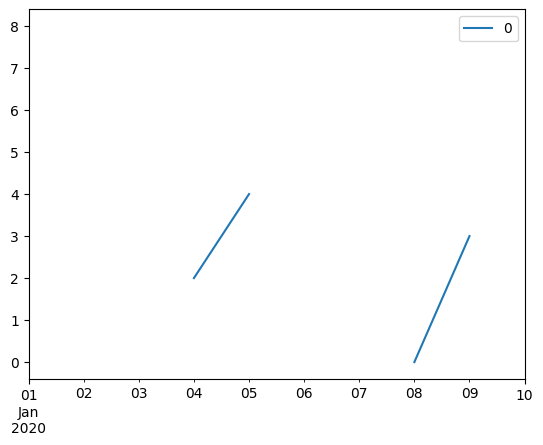

In [120]:
ts.plot()

In [121]:
ts.interpolate()


,0
2020-01-01,8.000000
2020-01-02,6.000000
2020-01-03,4.000000
2020-01-04,2.000000
2020-01-05,4.000000
2020-01-06,2.666667
2020-01-07,1.333333
2020-01-08,0.000000
2020-01-09,3.000000
2020-01-10,3.000000


<Axes: >

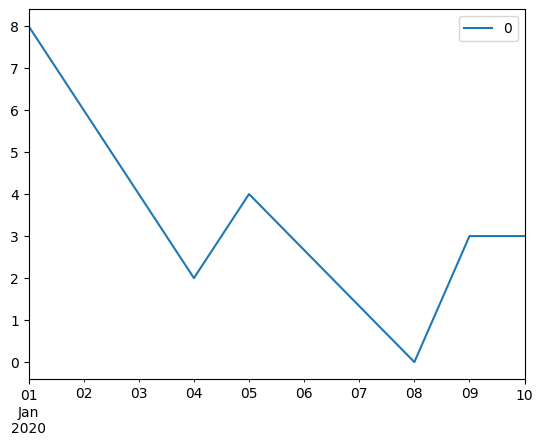

In [122]:
ts.interpolate().plot()

In [123]:
ts2 = ts.iloc[[0, 1, 3, 7, 9]]
ts2

,0
2020-01-01,8.0
2020-01-02,NaN
2020-01-04,2.0
2020-01-08,0.0
2020-01-10,NaN


In [126]:
ts2.interpolate()


,0
2020-01-01,8.0
2020-01-02,5.0
2020-01-04,2.0
2020-01-08,0.0
2020-01-10,0.0


In [127]:
ts2.interpolate(method="time")

,0
2020-01-01,8.0
2020-01-02,6.0
2020-01-04,2.0
2020-01-08,0.0
2020-01-10,0.0


In [128]:
ts2.interpolate(method="values")

,0
2020-01-01,8.0
2020-01-02,6.0
2020-01-04,2.0
2020-01-08,0.0
2020-01-10,0.0


#### If you are dealing with a time series that is growing at an increasing rate, use method='barycentric'.

In [129]:
df.interpolate(method="barycentric")

,A,B
0,1.00,0.250
1,2.10,-7.660
2,3.53,-4.515
3,4.70,4.000
4,5.60,12.200
5,6.80,14.400


#### If you have values approximating a cumulative distribution function, use method='pchip'.


In [130]:
df.interpolate(method="pchip")

,A,B
0,1.00000,0.250000
1,2.10000,0.672808
2,3.43454,1.928950
3,4.70000,4.000000
4,5.60000,12.200000
5,6.80000,14.400000


In [131]:
df.interpolate(method="akima")

,A,B
0,1.000000,0.250000
1,2.100000,-0.873316
2,3.406667,0.320034
3,4.700000,4.000000
4,5.600000,12.200000
5,6.800000,14.400000


In [132]:
df.interpolate(method="spline", order=2)

,A,B
0,1.000000,0.250000
1,2.100000,-0.428598
2,3.404545,1.206900
3,4.700000,4.000000
4,5.600000,12.200000
5,6.800000,14.400000


In [133]:

df.interpolate(method="polynomial", order=2)

,A,B
0,1.000000,0.250000
1,2.100000,-2.703846
2,3.451351,-1.453846
3,4.700000,4.000000
4,5.600000,12.200000
5,6.800000,14.400000


In [134]:
np.random.seed(2)

In [135]:
ser = pd.Series(np.arange(1, 10.1, 0.25) ** 2 + np.random.randn(37))
ser

0       0.583242
1       1.506233
2       0.113804
3       4.702771
4       2.206564
5       4.220753
6       6.752881
7       6.317212
8       7.942048
9       9.653492
10     12.801454
11     16.354708
12     16.041539
13     16.944575
14     20.789058
15     21.966340
16     24.980870
17     28.737501
18     29.502129
19     33.071525
20     35.121892
21     38.906066
22     42.506570
23     44.573721
24     48.661178
25     52.326316
26     55.612345
27     58.874888
28     62.578783
29     67.909005
30     71.980943
31     78.793867
32     78.565232
33     85.675227
34     90.620445
35     96.422134
36    100.501857
dtype: float64

In [137]:
missing = np.array([4, 13, 14, 15, 16, 17, 18, 20, 29])
missing


array([ 4, 13, 14, 15, 16, 17, 18, 20, 29])

In [138]:
ser.iloc[missing] = np.nan

In [139]:
methods = ['linear','quadratic','cubic']

In [140]:
df = pd.DataFrame({m: ser.interpolate(method=m) for m in methods})

<Axes: >

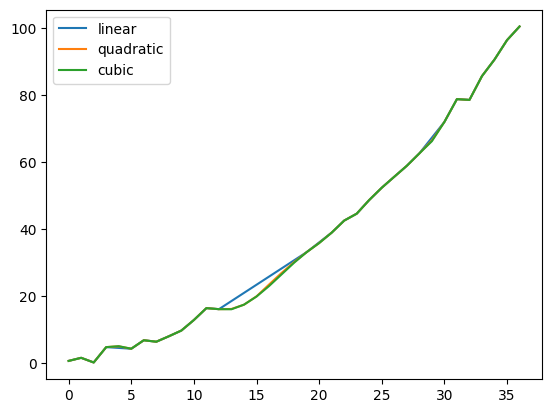

In [141]:
df.plot()

# Replacing Values

In [144]:
df = pd.DataFrame(np.eye(3))
df

,0,1,2
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0


In [146]:
df_missing = df.replace(0, np.nan)
df_missing

,0,1,2
0,1.0,NaN,NaN
1,NaN,1.0,NaN
2,NaN,NaN,1.0


In [148]:
df_filled = df_missing.replace(np.nan, 2)
df_filled

,0,1,2
0,1.0,2.0,2.0
1,2.0,1.0,2.0
2,2.0,2.0,1.0


In [149]:
df_filled.replace([1, 44], [2, 28])


,0,1,2
0,2.0,2.0,2.0
1,2.0,2.0,2.0
2,2.0,2.0,2.0


In [150]:
df_filled.replace({1: 44, 2: 28})

,0,1,2
0,44.0,28.0,28.0
1,28.0,44.0,28.0
2,28.0,28.0,44.0


In [152]:
d = {"a": list(range(4)), "b": list("ab.."), "c": ["a", "b", np.nan, "d"]}
df = pd.DataFrame(d)
df

,a,b,c
0,0,a,a
1,1,b,b
2,2,.,NaN
3,3,.,d


In [153]:
df.replace(".", np.nan)

,a,b,c
0,0,a,a
1,1,b,b
2,2,NaN,NaN
3,3,NaN,d


In [154]:
df.replace(r"\s*\.\s*", np.nan, regex=True)

,a,b,c
0,0,a,a
1,1,b,b
2,2,NaN,NaN
3,3,NaN,d
